# Проект. Прогнозирование оттока клиентов сети фитнес-центров 

 Привлечение новых клиентов  практически во всех случаях дороже процедур удержания. В то время как существующих клиентов можно активизировать специальным предложением с особыми условиями и тем самым сократить отток клиентов. Четкое понимание причин ухода клиентов — ключ к улучшению продуктов и услуг и, соответственно, сохранению успешности бизнеса.
Поэтому прогнозирование оттока клиентов сети фитнес-центров может помочь предвидеть и подготовиться к предпосылкам оттока еще на горизонте.

<a id = 'section1'></a>
# Оглавление

<a class="ancor" id="step_0"></a>
* [Цель работы, предмет исследования и описание данных](#step_1)
* [1  Загрузка данных](#step_2)
* [2  Исследовательский анализ данных (EDA)](#step_3)
 * [2.1  Отсутствующие признаки, средние значения и стандартные отклонения признаков](#step_4)
 * [2.2  Cредние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#step_5)
 * [2.3  Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#step_6)
 * [2.4  Матрица корреляций](#step_7)
* [3  Модель прогнозирования оттока клиентов](#step_8)
* [4  Kластеризация клиентов](#step_9)
* [Общие выводы](#step_10)

<a class="ancor" id="step_1"></a>
# Цель, предмет исследования и описание данных

<a class="ancor" id="step_1"></a>
**Цель работы:** провести анализ и подготовить план действий по удержанию клиентов,а именно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.
        
**Предмет исследования:** /datasets/gym_churn.csv


**Описание данных**                                                                                                
Набор данных включает следующие поля:                                                                                                                                                           
'Churn' — факт оттока в текущем месяце;                                                                           

Текущие поля в датасете:                                                                                          

*Данные клиента за предыдущий до проверки факта оттока месяц:*                                                    

'gender' — пол;                                                                                                   
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;                                     
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);                            
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);                                                                                       
'Phone' — наличие контактного телефона;                                                               
'Age' — возраст;                                                                                                  
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).                                         

*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:*

'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);              
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);                         
'Group_visits' — факт посещения групповых занятий;                                                                 
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;       
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;                     
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Для достижения поставленных целей необходимо было решить следующие **задачи:**

- загрузить данные, подготовить их и провести EDA,
- постройть модели прогнозирования оттока клиентов, обучив их логистической регрессией и случайным лесом, и оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке.


<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_2"></a>
## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

Загружены необходимые для визуализации и анализа  библиотеки

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.info()
print()
print('Количество полных строчных дубликатов:', data.duplicated().sum())
print()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB

Количество полных строчных дублик

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Файл прочитан read_csv(), разделителей не требуется, пропусков нет, полных строчных дубликатов нет, типы данных  корректны. В названиях столбцов присутствуют заглавные буквы, поэтому заменим названия столбцов (для снижения вероятности погрешности кода),буквы в нанаименованиях столбцов сделаем строчными.

In [3]:
data.columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn']
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Названия столбцов заменены, новые  наименования столбцов выведены для проверки .columns.

ВЫВОД:                                                                                                            
Данные готовы к EDA

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_3"></a>
## Исследовательский анализ данных (EDA)

<a class="ancor" id="step_4"></a>
### Отсутствующие признаки, средние значения и стандартные отклонения признаков

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


ВЫВОД:
 
Распределение по полу примерно одинаково (49:51%).                                                                  
Большинство клиентов (85%) живет или работает рядом с фитнес-клубом.                                                
Примерно половина клиентов являются сотрудниками партнерских организаций.                                           
31% клиентов пришли по программе "Приведи друга".                                                                   
Контакты предоставили 90% клиентов.                                                                                 
Средняя длительность абонементов клиентов - 4.6 месяцев.                                                             
Около 40% клиентов посещают групповые занятия.                                                                       
Средний возраст клиентов 29 лет, отклонение 3 года.  
Средние дополнительные расходы на клиента - 146.                                                                     
Средний срок до окончания договора - 4.3 месяцев.                                                                   
Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев.                                             
Средняя частота посещений за все время - 1.87 раз в неделю.                                                         
Средняя частота посещений за последний месяц - 1.76 раз в неделю.                                                   
        
Доля оттока - 27%.

Хотелось бы обратить внимание, а переменные Age и Avg_additional_charges_total. У них очень разные по величине стандартные отклонения. Это говорит о том, что переменные нужно стандартизировать перед обучением. Для логистической регрессии и дерева стандартизация не обязательна.

Мне видится, что люди реже ходят и покупают абонементы в фитнесклубы в теплые месяцы,  среди признаков  - данных, связанных с сезонами нет, было бы интересно изучить отток клиентов в зависимости хотя бы от времени года.  

In [5]:
data['contract_period'].unique()

array([ 6, 12,  1])

Примем к сведению, что нет абонементов на 3 месяца, хотя озвучено по описанию данных, возможно клиентам это будет интересно, а фитнес клубу более выгодно, чем 1 месячные абонементы

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_5"></a>
### Cредние значения признаков в двух группах — тех, кто ушел в отток, и тех, кто остался 

In [6]:
data.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


ВЫВОД:
Средние значения признаков  в двух группах - тех, кто ушел в отток, и тех, кто остался, фиксируют следующее:
1. нет зависимости на отток
 - по гендерному признаку, мужчин  и/или женщин одинаковое соотношение 49/51 (или 51/49);
 - по наличию информации о номере телефона;
2. близкое расположение от фитнес-клуба оказывает влияние на отток -  на 11% клиентов больше среди "удержавшейся" группы
3. затраты на абонемент также оказывает влияние на лояльность клиентов - оставшихся клиентов значительно среди тех, кто купил абонемент по акции или партнерской программе
4. контрактный период, количество месяцев  до окончания контрактов, время с момента первого обращения среди тех, кто ушел в отток, значительно ниже, чем у тех, кто остался.
5. клиенты, которые остались членами клуба, чаще и стабильней посещают его, т.к. значение  среднее значение  признака еженедельного посещение за последний месяц и за весь период выше в этой группе клиентов и близки друг к другу ( 2,025 и 2,028),  чем у тех, кто ушел в отток (1,475  и 1,045). 
6. 46% среди тех , кто остался, хотя бы раз посещали групповые занятия, что значительно ниже ущедших клиентов - 27%
7. Средний возраст  группы клиентов, ушедших в отток, меньше на 3 года
8. Клиенты, которые ушли в отток, в среднем на 27% (больше четверти) тратят меньше, чем  клиенты, которые остались.

 Итак, предварительно все признаки, кроме пола и наличия информации о контактах, могут выступать маркерами  оттока клиента, при этом часть из них - коррелируются друг с другом (что и просто логически изначально было понятно, числовые значения только подтвердили это): еженедельное посещение за последний месяц и за весь период выше, контрактный период, количество месяцев  до окончания контрактов, время с момента первого обращения.  Необходимо построение матрицы корреляций и с целью оценки степени влияние признаков на отток и на друг друга, а также более детальное рассмотрение признаков, особенно влияющих на отток, обесценивать влияние на отток гендерного признака и нежелания давать контакты пока преждевременно, эти признаки могут дать более цельное восприятие портрета клиента при кластеризации  .

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_6"></a>
### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

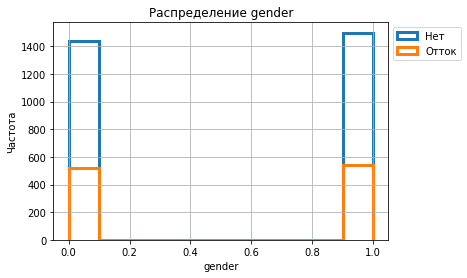

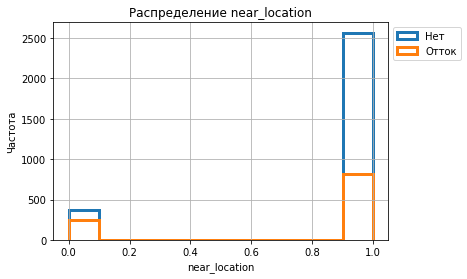

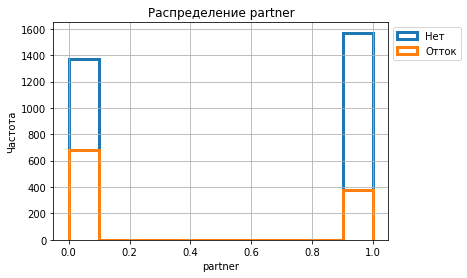

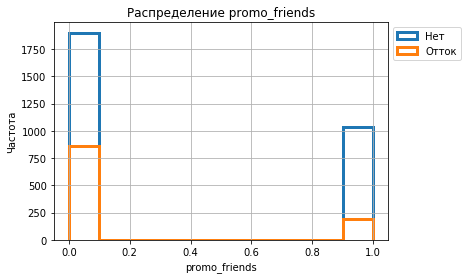

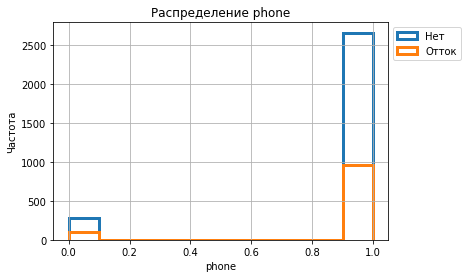

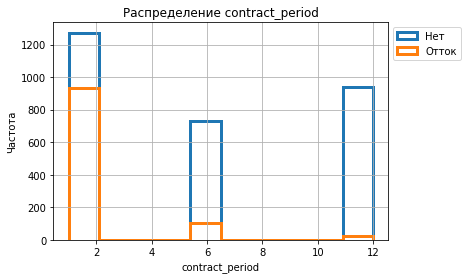

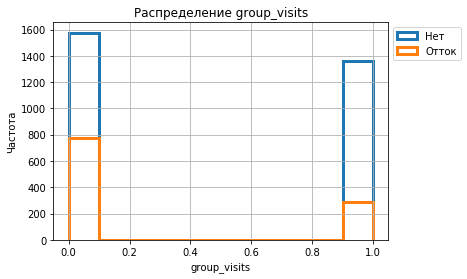

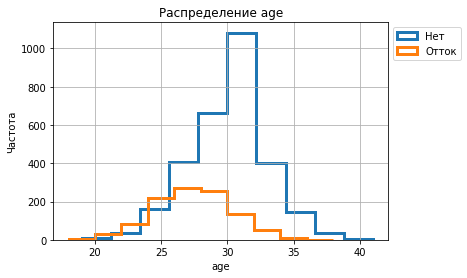

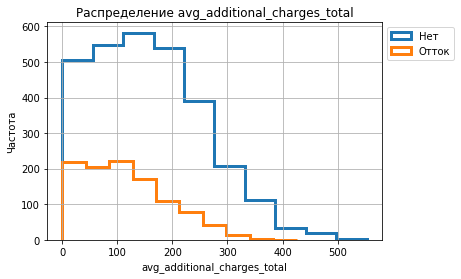

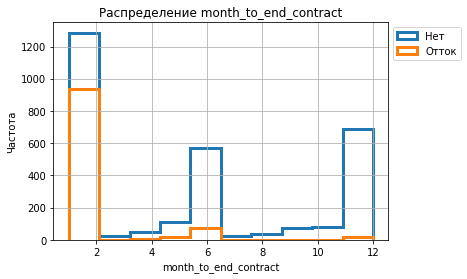

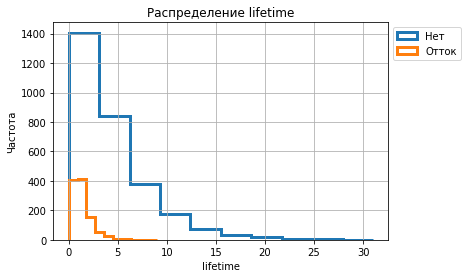

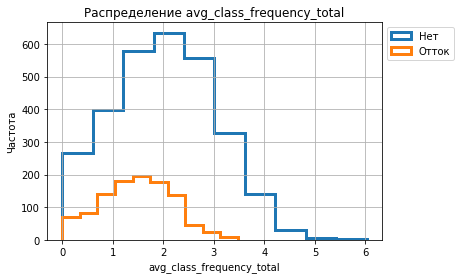

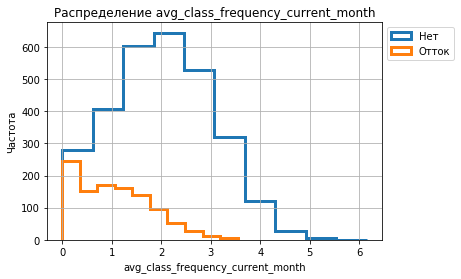

In [7]:
for col in data.drop('churn', axis = 1).columns:

    data[data['churn'] == 0][col].hist(histtype='step', linewidth = 3, label = 'Нет')

    data[data['churn'] == 1][col].hist(histtype='step', linewidth = 3, label = 'Отток')

    plt.ylabel("Частота")
    plt.xlabel(col)
    plt.title("Распределение " + col, color='k', fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

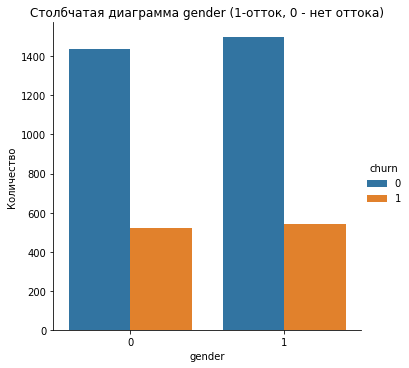

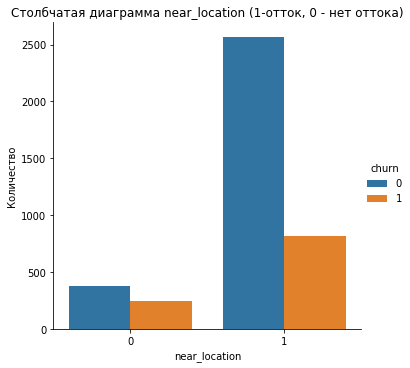

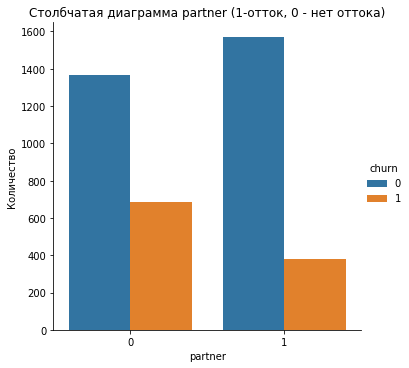

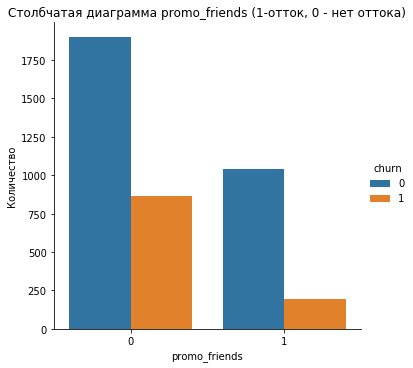

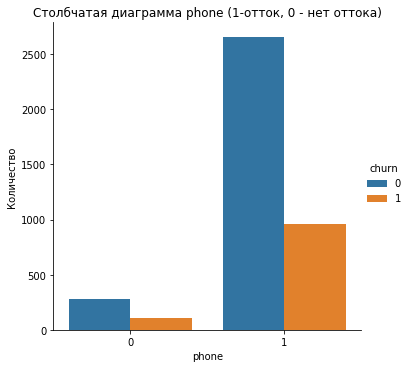

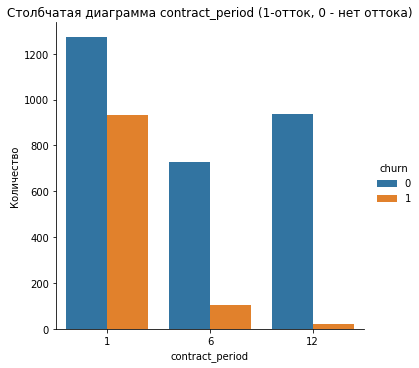

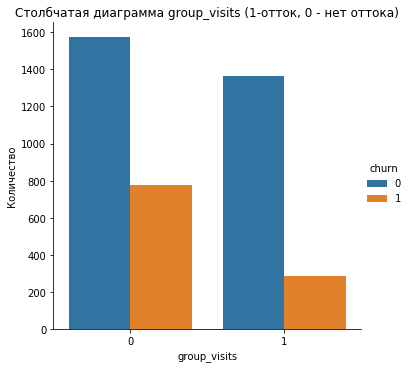

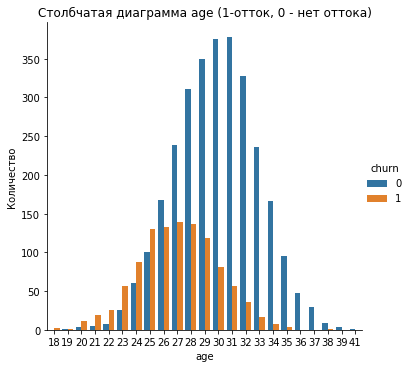

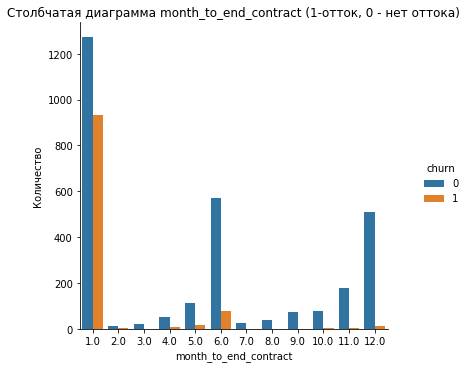

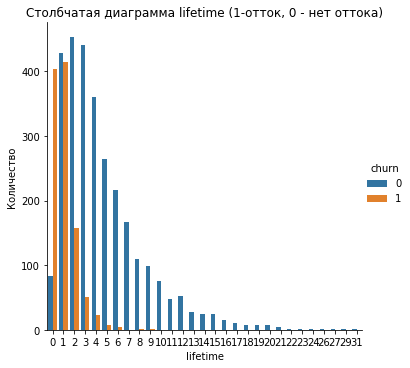

In [8]:
for col in data.drop(['churn','avg_additional_charges_total','avg_class_frequency_total',\
                      'avg_class_frequency_current_month'], axis = 1).columns:
    
        sns.catplot(x=col,
            hue='churn',
            kind='count',
            data=data);
        plt.ylabel("Количество")
        plt.xlabel(col)
        plt.title("Столбчатая диаграмма " + col + " (1-отток, 0 - нет оттока)", color='k', fontsize=12)
      
        plt.show()

Возьмем на заметку:                                                                                                 
Клиент от партнера или от друга реже уходит.                                                                        
Критические сроки по оттоку: 1 месяц,  6 месяцев - не такой как в 1 месяц, но существенный.                         
Клиенты, посещающие клуб 3 месяца и более становятся все более и более лояльные (отток значительно снижается, вопрос  - почему нет 3 месячных контрактов).                                                                                
Наибольшее количество клиентов 28-32 годa - строить групповые занятия, ориентируясь на данную возрастную категорию.
Клиенты, посещающие групповые занятия, реже уходят.                                                                 
Конечно, меньше всего оттока у клиентов-обладателей 12месячных абонементов. Но клиенты-обладатели 6 месячных абонементов достаточно многочисленны и оптимальный прайс на них - возможность удержать клиентов.                   
Дополнительные услуги востребованы и у клиентов в оттоке - они тоже могут помочь удержать клиента и принести ощутимую прибыль.                                                                                                   

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_7"></a>
### Матрица корреляций

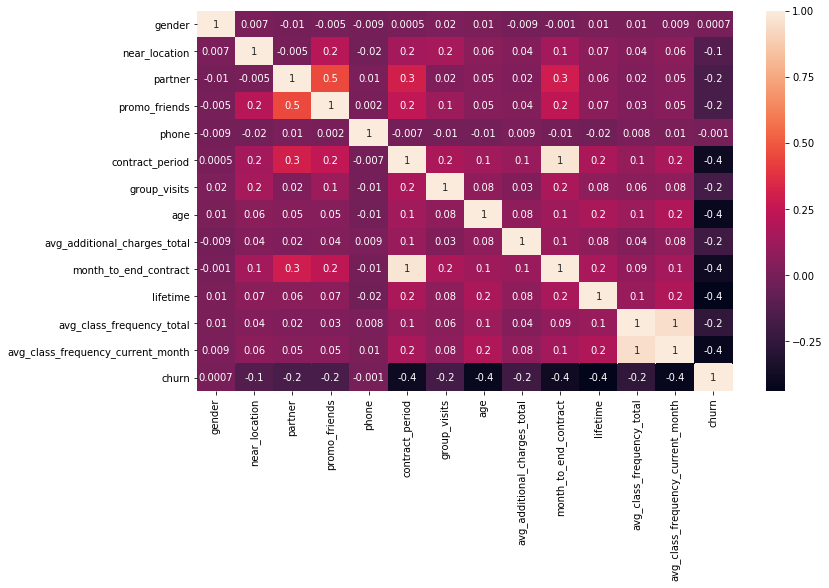

In [9]:
#cm = data.corr() 
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(data.corr(), annot = True, fmt='.1g')
#ax.set_ylim(7, 0)
plt.show()

ВЫВОД

1. Можно констатировать наличие 2 пар мультиколлинеарных признаков:                                               
контрактный период(сontract_period) и срок окончания контракта (month_to_end_contract),                           
средняя частота посещений в неделю за все время (avg_class_frequency_total) и средняя частота посещений в неделю за предыдущий месяц (avg_class_frequency_current_month). 
2. Присутствует  корреляция 0,5 между признаками Partner и Promo_friends
3. Ярко выраженной зависимости оттока  от признаков не обнаружено, наибольшая обратная корреляция оттока (коэффициент корреляции -0,4) есть с признаками:                                                                  
контрактный период(сontract_period);                                                                             
возраст (gender)                                                                                                  
срок окончания контракта (month_to_end_contract)                                                                  
средняя частота посещений в неделю за предыдущий месяц (avg_class_frequency_current_month)                         
время с момента первого обращения в фитнес-центр (lifetime).

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_8"></a>
## Модель прогнозирования оттока клиентов

In [10]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn', axis=1)
y = data['churn']

#разделяем модель на обучающую и валидационную выборки, \
#зададим пропорцию классов при разделении на обучающий и проверяющий датасеты с помощью параметра stratify функции \
#train_test_split, будем стратифицировать в соответствии распределению по классам в y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify = y)

# задаем алгоритм для модели логистической регрессии
model = LogisticRegression(solver='liblinear')

# обучаем модель
model.fit(X_train, y_train)

# делаем прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

# рассчитываем метрики

print('Метрики для модели на основе алгоритма логистической регрессии')
print()
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}\n'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))
print()

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df_lr = pd.DataFrame(model.coef_.T, X.columns).reset_index()
fi_df_lr .columns = ['feature', 'importances']
fi_df_lr['importances'] = fi_df_lr['importances'].apply(lambda x: abs(x))
print('Коэффициенты признаков:')
print(fi_df_lr.sort_values(by='importances', ascending=False))

Метрики для модели на основе алгоритма логистической регрессии

Accuracy: 0.93
Precision: 0.89
Recall: 0.84
F1: 0.87

ROC_AUC: 0.98

Коэффициенты признаков:
                              feature  importances
12  avg_class_frequency_current_month     3.880047
11          avg_class_frequency_total     3.228441
10                           lifetime     0.907725
6                        group_visits     0.708445
4                               phone     0.468147
3                       promo_friends     0.320300
7                                 age     0.195834
5                     contract_period     0.194969
1                       near_location     0.093922
9               month_to_end_contract     0.078582
0                              gender     0.049632
8        avg_additional_charges_total     0.004856
2                             partner     0.002711


In [11]:
#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# делаем прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1] 

# рассчитываем метрики
print('Метрики для модели на основе алгоритма случайного леса')
print()
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}\n'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df_rf =pd.DataFrame(data = {'feature': X.columns, 'importances': rf_model.feature_importances_})
print('Коэффициенты признаков:')
print(fi_df_rf.sort_values(by='importances', ascending = False))

Метрики для модели на основе алгоритма случайного леса

Accuracy: 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85

ROC_AUC: 0.97
Коэффициенты признаков:
                              feature  importances
10                           lifetime     0.270336
12  avg_class_frequency_current_month     0.176142
11          avg_class_frequency_total     0.135955
7                                 age     0.121477
8        avg_additional_charges_total     0.088327
9               month_to_end_contract     0.072941
5                     contract_period     0.067406
6                        group_visits     0.016090
0                              gender     0.012293
2                             partner     0.012099
3                       promo_friends     0.010499
1                       near_location     0.009924
4                               phone     0.006511


ВЫВОДЫ:
Обучены две модели — логистической регрессей и случайным лесом.

Доля правильных прогнозов и полнота незначительно выше у модели логистической регрессии

В ТОП-3 по весу признаков в случае обучения модели как логистической регрессей и случайным лесом попали:
    длительность текущего действующего абонемента
    средняя частота посещений в неделю за предыдущий месяц
    средняя частота посещений в неделю за все время    

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_9"></a>
## Kластеризация клиентов

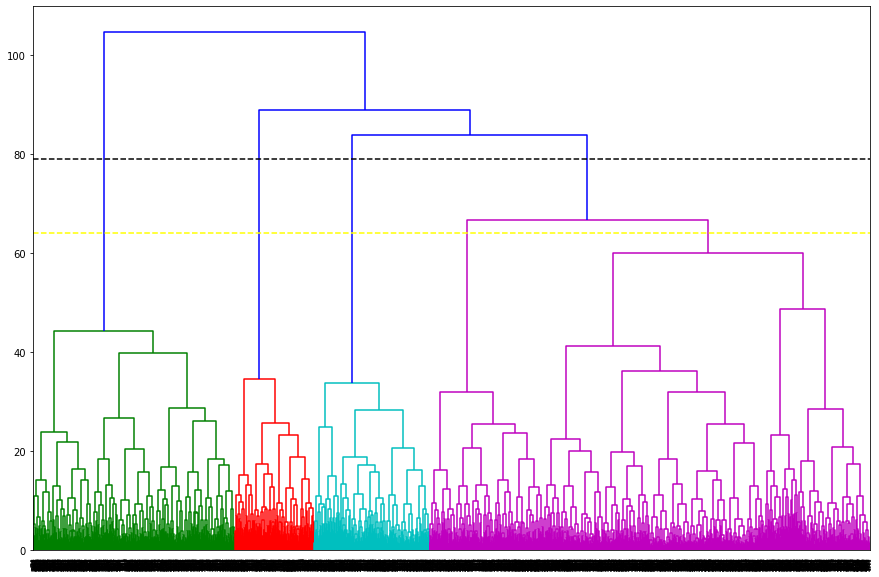

In [12]:
#Откладываем в сторону столбец с оттоком - сделано ранее X = data.drop('churn', axis=1)

# Стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Cтроим матрицу расстояний функцией linkage() на стандартизованной матрице признаков 
linked = linkage(X_sc, method = 'ward') 

# нарисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.axhline(y=79, color='black', linestyle='--') 
plt.axhline(y=64, color='yellow', linestyle='--') 
plt.show() 

ВЫВОД                                                                                                              
Согласно дендрограмме оптимальное число кластеров 4 — разных цветов на графике равно четырем. Из графика также видно, что розовый кластер  самый большой и разветвленный, левая ветвь  явно "стоит особняком" от остальных ответвлений розового кластера и ниже всех остальных ответвлений других цветов на этом уровне. Расстояния, при которых можно  закончить объединение объектов  и образовать 5 и  4 кластера различаются максимум на 15. По моей оценке - наиболее оптимально спрогнозировать 5 кластеров клиентов.

Примечание: Если оставить при построении дендрограммы столбец с оттоком - то можно ввизуализировать оптимальное  количество кластеров  равное 5 (5 разных цветов будет на графике)

In [13]:
#спрогнозируйте кластеры клиентов

sc = StandardScaler()
X_sc = sc.fit_transform(X)

# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)
data['cluster_km'] = labels

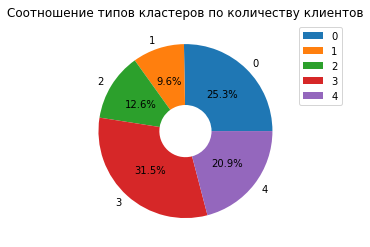

In [14]:
cluster_km = data.pivot_table(index = 'cluster_km', values = 'churn', aggfunc = 'count')
cluster_km.columns = ['Количество']
cluster_km.index.name = 'Тип'
cluster_km.plot(y='Количество',kind='pie',autopct='%1.1f%%', wedgeprops=dict(width=0.7))
plt.title("Соотношение типов кластеров по количеству клиентов")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.show()

In [15]:
data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


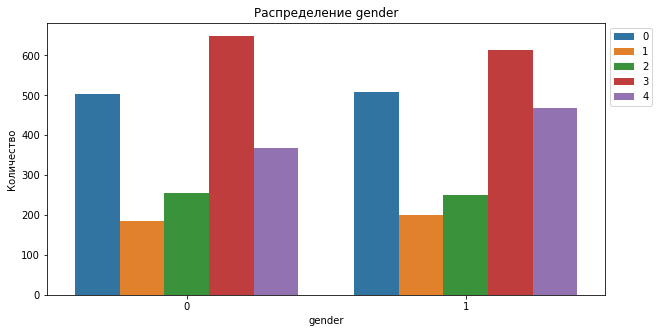

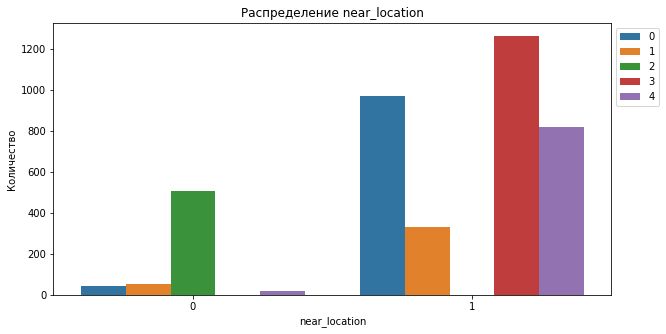

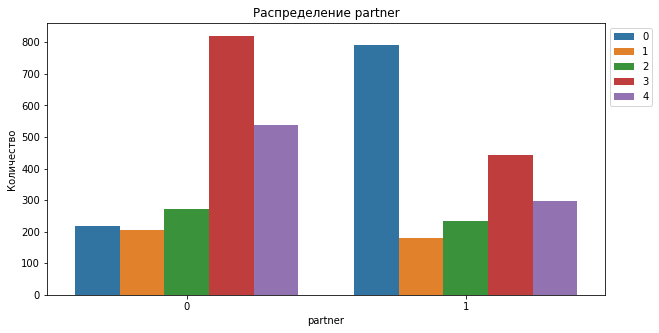

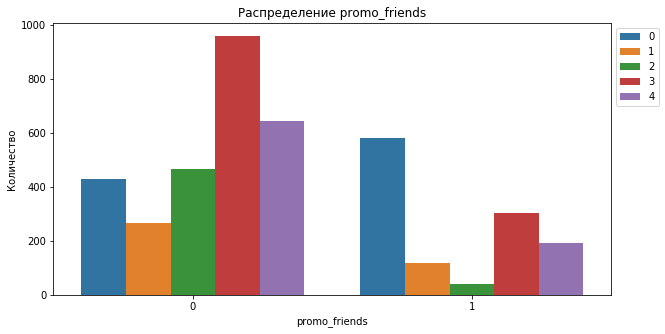

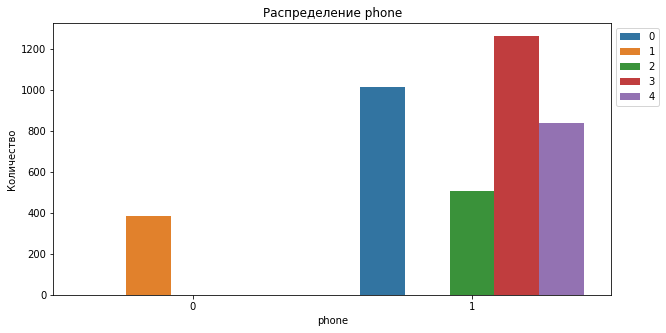

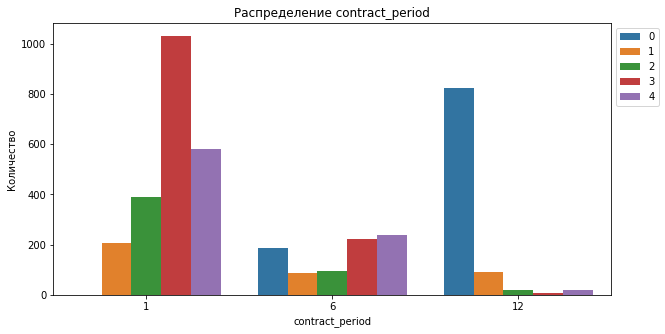

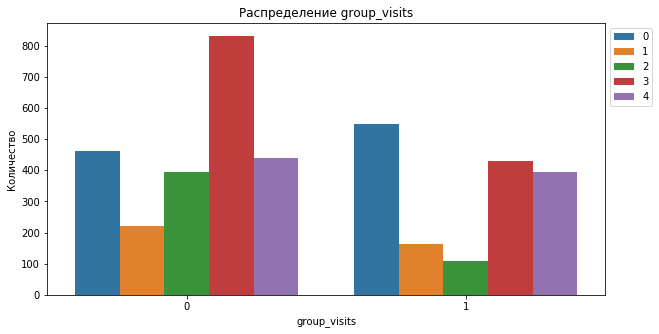

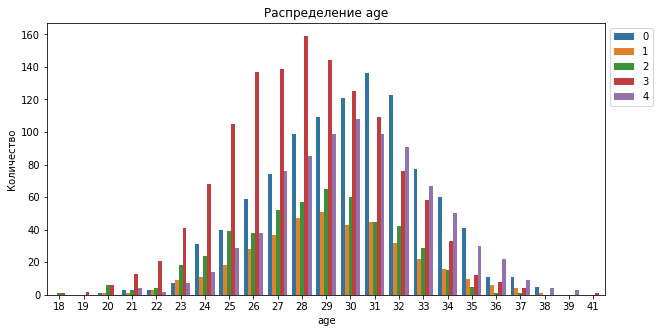

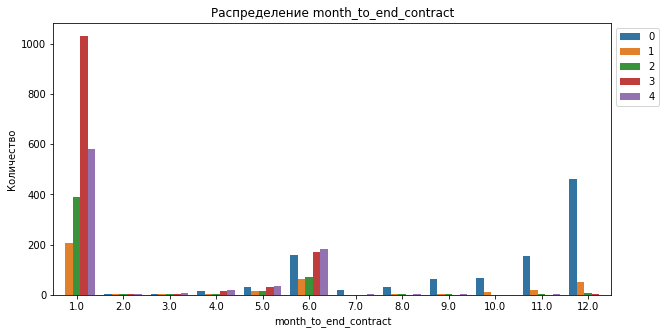

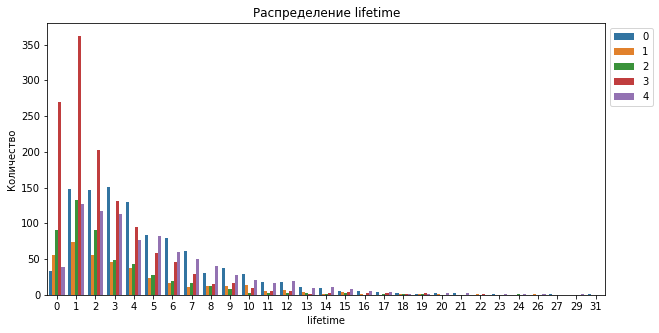

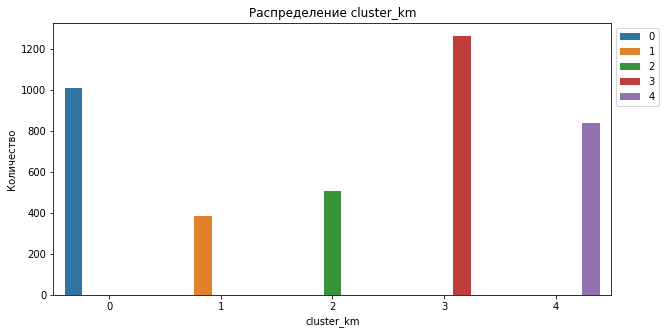

In [16]:
for col in data.drop(['churn','avg_additional_charges_total','avg_class_frequency_total',\
                      'avg_class_frequency_current_month'], axis = 1).columns:
    
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='cluster_km', data=data);
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
        plt.title("Распределение " + col , color='k', fontsize=12)
        plt.ylabel('Количество')
        plt.show()

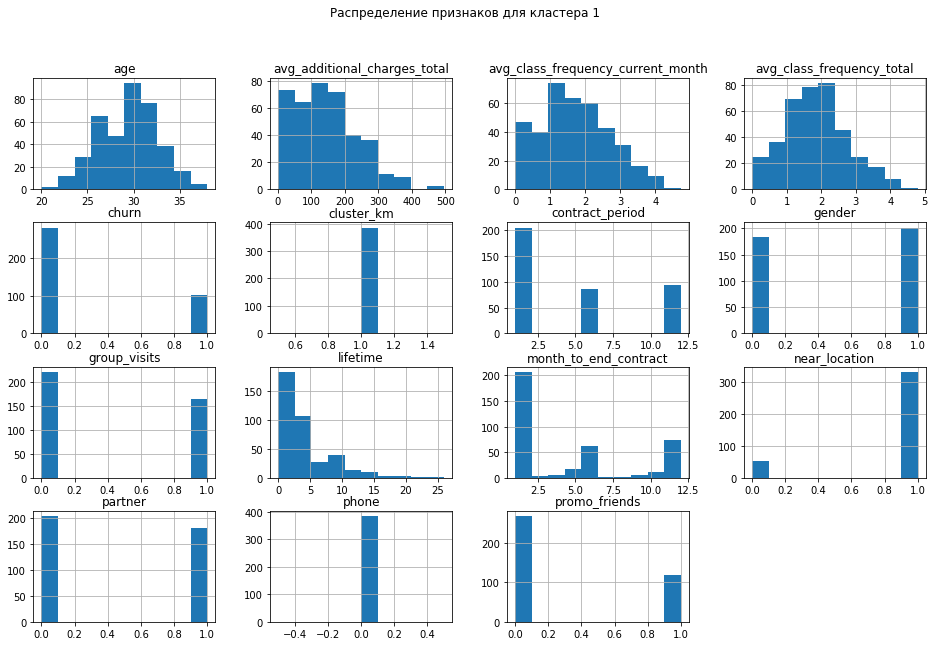

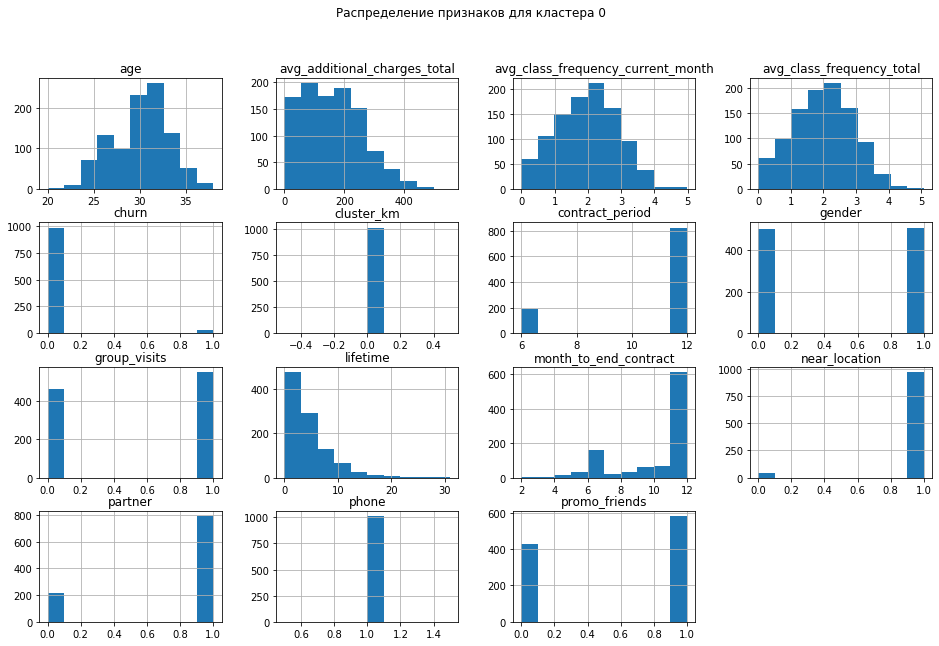

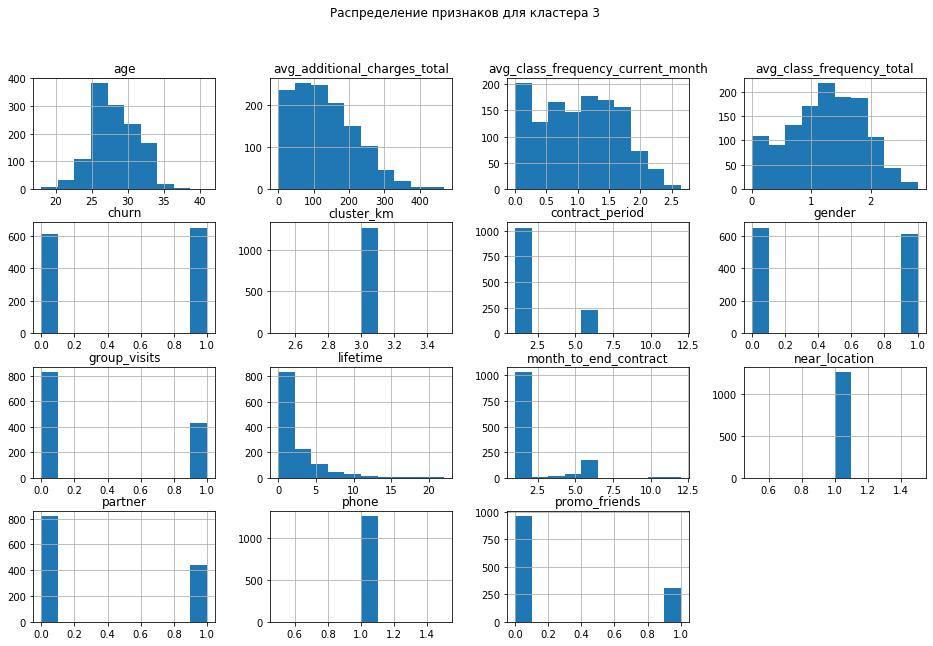

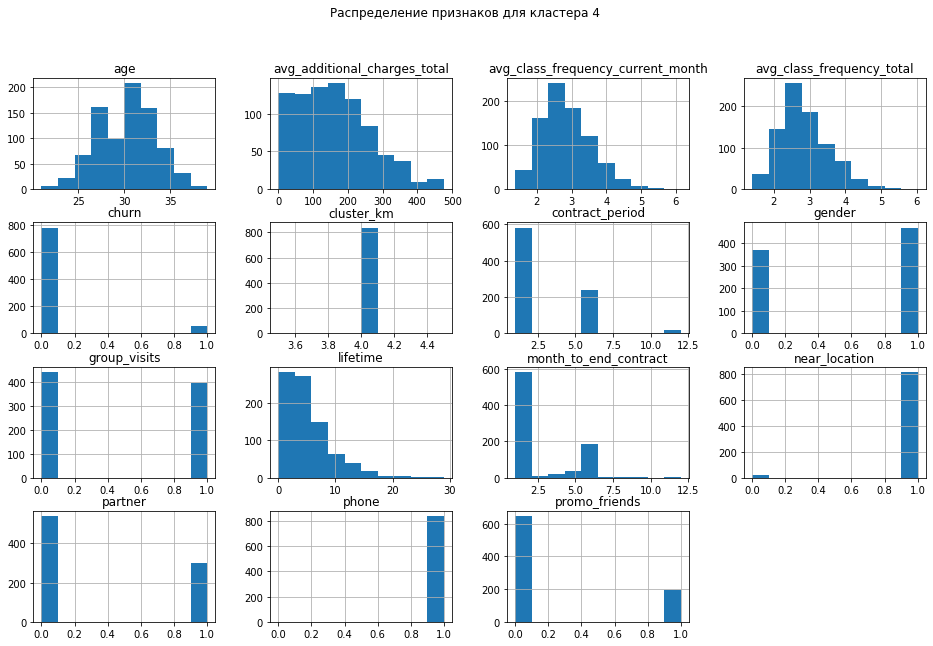

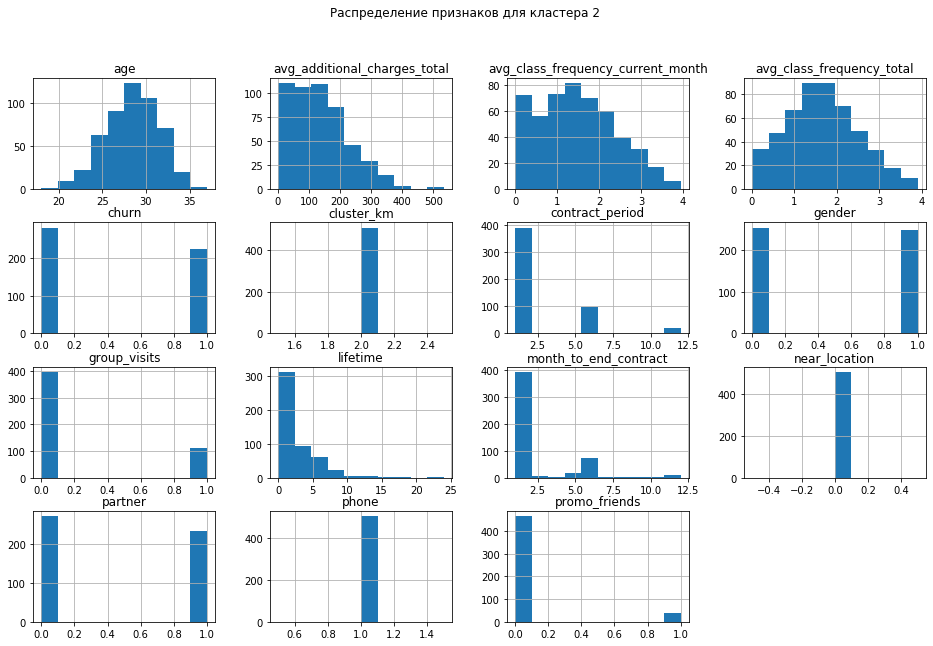

In [17]:
for i in data['cluster_km'].unique():
    
        data[data['cluster_km'] == i].hist(figsize=(16,10))
        plt.suptitle('Распределение признаков для кластера {}'.format(i))
        plt.show()

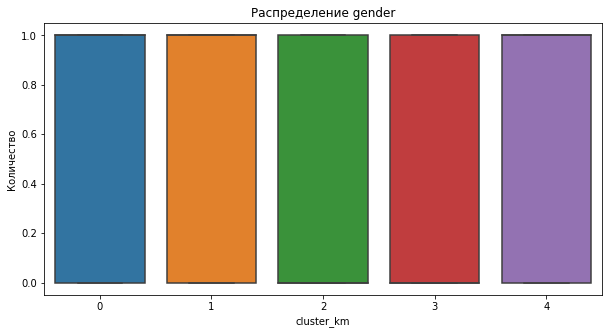

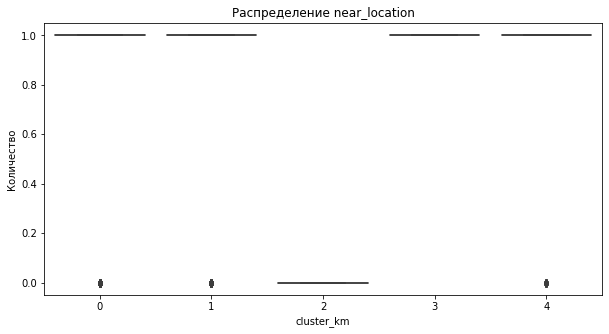

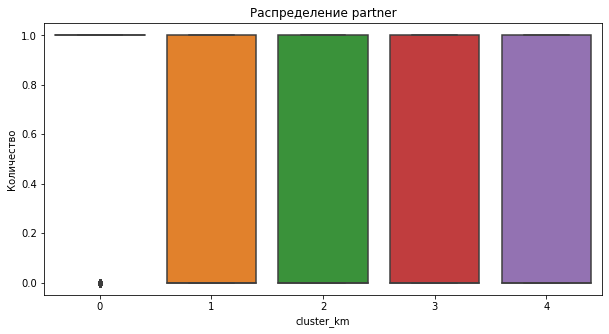

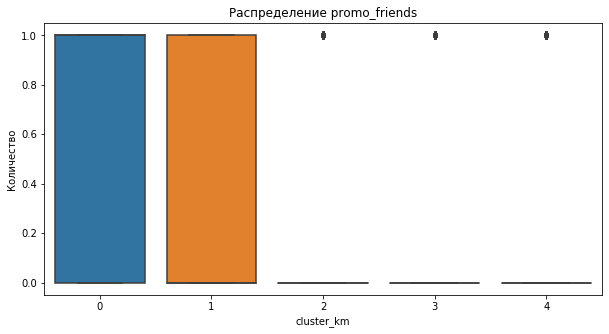

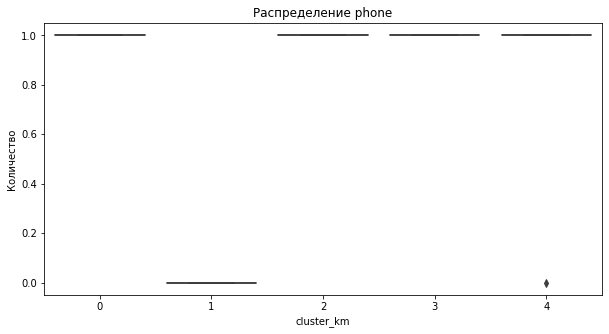

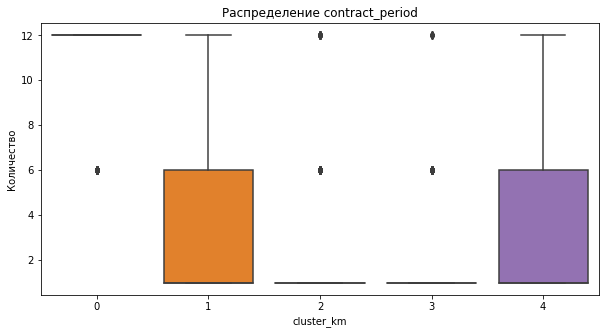

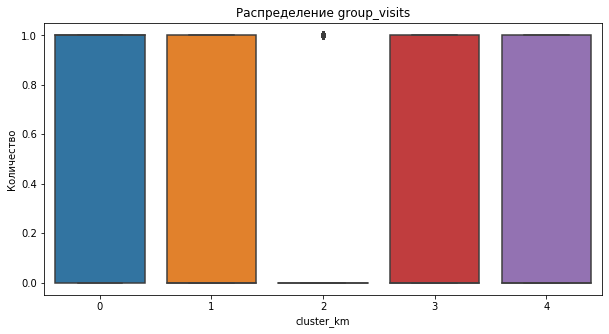

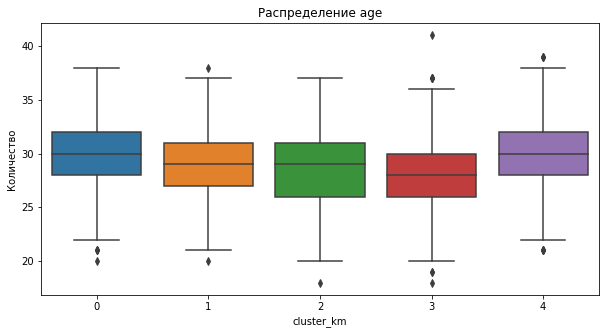

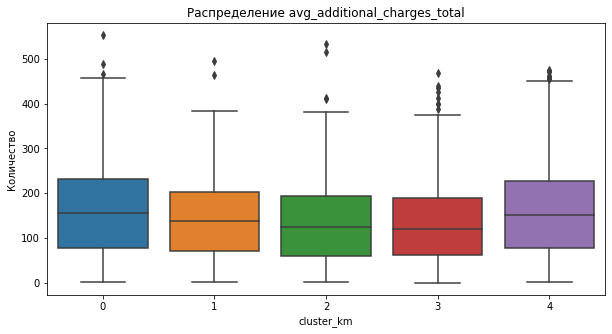

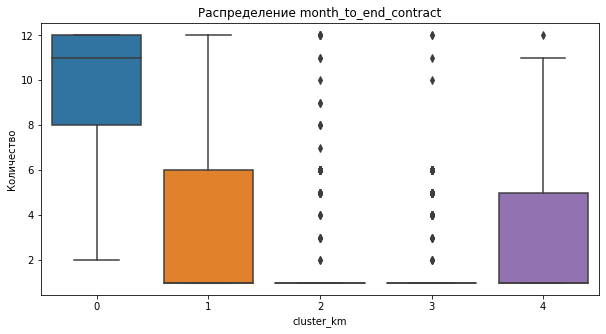

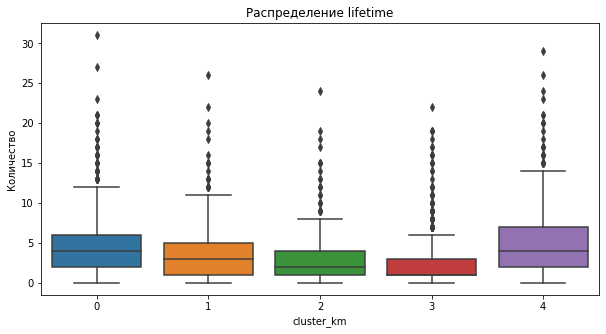

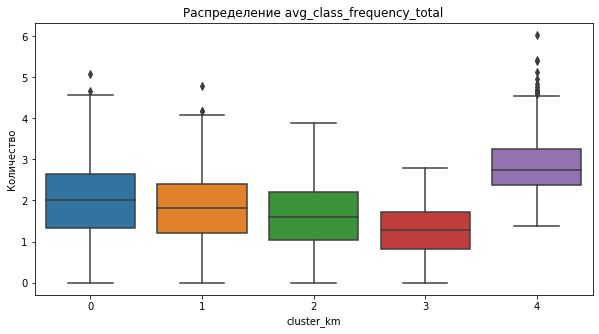

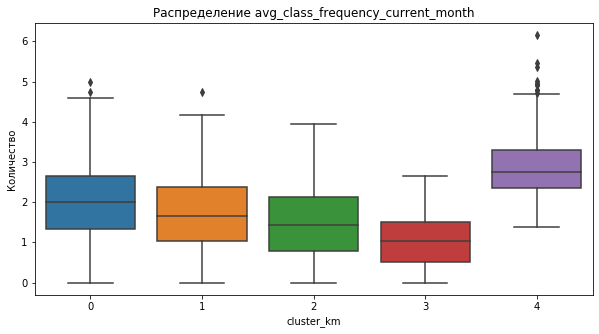

In [18]:
for col in data.drop(['churn', 'cluster_km'], axis = 1).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cluster_km', y=col, data=data)
    plt.title("Распределение " + col , color='k', fontsize=12)
    plt.ylabel('Количество')
    plt.show()

ВЫВОД

**Кластер 0**                                                                                                     
ЗОЖ экстраверты, лояльные клиенты                                                                                                       
Самый низкий процент оттока -  менее 3%. Доля этого типа клиентов - 25,3 %

*Выделяются покупкой  наибольшего по длительности абонемента (12 мес) по акциям  или партнерской программе,  и склонностью к групповым занятиям*

Живут или работают  преимущественно недалеко от центра.                                                             
Порядка 78% пришли по партнерской программе.                                                                        
Порядка 57% пришли по акции «Приведи друга».                                                                        
Абонементы на 12 месяцев.                                                                                           
Порядка % из них посещают групповые занятия.
Частота посещений - 1,98 ( приближается к 2 раза в неделю) как за последний месяц, так и за весь срок посещения.    
Траты на допуслуги - 161, сопоставимы с кластером 4, значительно выше, чем у клиентов 1,2,3 кластеров.

**Кластер 1**                                                                                                     
Интроверты, средний риск оттока, воздействие на клиента можно осуществлять только при личном присутствии.           

Средний процент оттока -  27%. Доля этого типа клиентов - 9,6 %.                                                    

*Выделяются отсутствием данных по телефону,абонементы средней длительности (6 мес) со значительной долей акционных и  "партнерских" покупок, склонны к групповым занятиям*.                                                               

Живут или работают недалеко от центра.                                                                             
Почти половина пришли по партнерской программе.                                                                     
Почти треть пришли по акции «Приведи друга».                                                                        
Абонементы преимущественно на 6 месяцев месяцев, 42% из них посещают групповые занятия.                             
Частота посещений — 1,84 раза в неделю, скорее 2 раза посещения в неделю, учитывая значительное увеличение оттока по сравнению с кластером 0, стоит обращать внимание на снижение посещения в неделю за последний месяц по сравнению 
с показателем за весь срок посещения.                                                                               
Траты на допуслуги - 143, существенно ниже, чем у лояльных клиентов кластеров 0 и 4, и выше, клиентов кластеров с высокой долей оттока 2 и 3.                                                                                        

**Кластер 2**                                                                                                     
Залетные птицы, высокий риск оттока                                                                              

Высокий процент оттока — 44%.  Доля этого типа клиентов - 12,6%.

Выделяются тем, что НЕ  живут или работают близко от центра, реже всех посещают групповые занятия, абонементы преимущественно на 3 месяца, много из которых - по патнерской программе .
Частота посещений — 1 или 2 раза в неделю

Мне видится, что эти клиенты самые сложные для прогноза и удержания, покупка абонементов у таких клиентов могла быть сделана "на эмоциях", могла быть, конечно, и  обдумана, учтен материальный фактор, комфортность  центра, возможности проводить время и общаться с друзьями (допустим, встречи по выходным - и , соответственно, абонементы только на эти дни). 
Однозначно, что данный типаж клиента можно и нужно удерживать акциями, особыми условиями абонемента (по выходным/будням, утренние/вечерние), мотивировать  на покупки допуслуг центра, тем самым "добирая" прибыль фитнес-центра и снижая риски ухода клиента. 

   
**Кластер 3**                                                                                                     
Мо'лодежь, самый высокий риск оттока, самый большой по количеству.                                                

Отток — более 50%.  Самая высокая доля этого типа клиентов - 31,5%.

Обращает на себя внимание, что средний возраст у этого кластера клиентов в среднем ниже, чем у других(сопоставим лишь с залетными птицами), короткий срок абонемента (скорее 1 месяц) и самая низкая частота посещения центра в неделю (скорее 1 раз в неделю, чем 2). Есть определенный интерес к групповым занятиям - треть клиентов этого кластера хотя бы раз посещала груповые занятия. Более трети  клиентов этого типа купили абонемент по партнерской программе, четверть - по акции "приведи друга"

Этот кластер самый большой и требует самого пристального внимания, отток клиентов (в настоящий момент это 51%!!!? т.е. половина уходит) из него может сильно ударить (или уже "ударил", средняя частота за последнюю неделю ниже значительно частоте за весь срок) по бизнесу. Но и успешная тактика взаимодействия с данным типом клиентов  может дать наибольший переход "мо'лодежи' лояльных  клиентов и принести доход клубу.

Клиенты покупают  короткие ежемесячные абонементы: возможно более длительные - не по карману или у конкурентов ниже по цене абонементы, возможно часть заинтересует и удержит рассрочка платежа.Мне кажется, введение 3 месячных абонементов - удачная мера к таким клиентам.  Возможно у молодых клиентов быстро падала мотивация ходить на тренировки, другие интересы появлялись - попробовать поднять интерес путем оповещения смс по телефону, рассмотреть возможность организации странички клуба в различных соцсетях и стимулировать регистрироваться в них и знакомиться и общаться через них, рассказывать о достижениях друг друга, пробовать воздействовать через них. Это можно делать и  комплиментами на допуслуги и тем самым, мотивируя на покупку допуслуг. Вспомним, что первые три месяца самый большой отток

**Кластер 4**
Спортсмены, лояльные клиенты, низкий отток                                                                        

Отток — 6,8%.  Доля этого типа клиентов - 20,9%.

*Выделяются тем, что чаще всех остальных посещают фитнес-клуб в неделю. Они обладатели преимущественно 1 и 6 месячных контрактов. Повысить количество лояльных среди них помогут, мне кажется, те же самые 3х месячные абонементы*.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_10"></a>

# Общие выводы 

   Для достижения поставленной цели:"Провести анализ и подготовить план действий по удержанию клиентов сети фитнес-центов" был изучен файл:datasets/gym_churn.csv. В нем содержалась информация о факте оттока 4000 клиентов и 13  возможных признаках, которые могли повлиять на факт оттока клиента.   
   В анализируемом файле не было пропусков и  полных строчных дубликатов, типы данных были корректны. В названиях столбцов присутствовали заглавные буквы, которые были заменены на строчными.
   При анализе отсутствующих признаков, средних значений и стандартных отклонений признаков было выявлено отсутствие 3 месячных абонементов  в сроках контрактов. 
   При сравнении  средних величин признаков среди тех , кто ушел в отток, и среди тех, кто остался, было установлено, что все признаки, кроме пола и наличия информации о контактах, могут выступать маркерами оттока клиента, при этом часть из них - коррелируются друг с другом : еженедельное посещение за последний месяц и за весь период выше, контрактный период, количество месяцев до окончания контрактов, время с момента первого обращения. 
   
   Далее была построены и проанализированы матрица корреляции, столбчатые диаграммы и  распределения признаков для тех, кто остался и для тех , кто ушел в отток,  модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце двумя методами, проведена кластеризация объекта.
   
   В результате этого: 
   1. Научились прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента путем обучения двух моделей логистической регрессей и случайным лесом.
    Установили, что доля правильных прогнозов и полнота незначительно выше у модели логистической регрессии.

   2. Посредством кластеризации клиентов сформировали 5 типичных портретов клиентов: 
                                                                                                    
 1. ЗОЖ экстраверты: по расчетам у них самый процент оттока -  менее 3%, доля этого типа клиентов - 25,3 %, покупают преимущественно длительные абонементы по партнерским и акционным программам и посещают групповые занятия, стабильны в посещение занятий до 2 раз неделю
 2. Залетные птицы: по расчетам у них высокий процент оттока — 44%,  доля этого типа клиентов - 12,6%, выделяются тем, что  не живут или работают близко от клуба, реже всех посещают групповые занятия, абонементы преимущественно на 3 месяца, много из которых - по патнерской программе. Частота посещений — 1 или 2 раза в неделю
 3. Интроверты, клиенты со средним риск оттока: по расчетам у них средний  процент оттока 27%, доля этого типа клиентов - 9,6 %.Воздействие на этих клиента можно осуществлять только при личном общении, т.к. выделяются отсутствием данных по телефону,абонементы покупают средней длительности (6 мес) со значительной долей акционных и  "партнерских" покупок, склонны к групповым занятиям
 4. Мо'лодежь, самый высокий риск оттока 50%, самый большой по количеству 31,5%.Обращает на себя внимание, что средний возраст у этого кластера клиентов в среднем ниже, чем у других(сопоставим лишь с залетными птицами), короткий срок абонемента (скорее 1 месяц) и самая низкая частота посещения центра в неделю (скорее 1 раз в неделю, чем 2). Есть определенный интерес к групповым занятиям - треть клиентов этого кластера хотя бы раз посещала груповые занятия. Более трети  клиентов этого типа купили абонемент по партнерской программе, четверть - по акции "приведи друга". Отток клиентов этого типа наиболее большой и в абсолютных и относительных величинах.
 5. Спортсмены: низкий отток — 6,8%, доля этого типа клиентов - 20,9%.Выделяются тем, что чаще всех остальных посещают фитнес-клуб в неделю. Они обладатели преимущественно 1 и 6 месячных контрактов.

   3. Проанализировали основные признаки, наиболее сильно влияющие на отток. Ярко выраженной зависимости оттока от признаков не обнаружили, наибольшая обратная корреляция оттока (коэффициент корреляции -0,4) есть с признаками:
    контрактный период;
    возраст 
    срок окончания контракта 
    средняя частота посещений в неделю за предыдущий месяц 
    время с момента первого обращения в фитнес-центр.
 Зафиксировано наличие 2 пар мультиколлинеарных признаков:
    контрактный период и срок окончания контракта,
    средняя частота посещений в неделю за все время и средняя частота посещений в неделю за предыдущий месяц. 
 В ТОП-3 по весу признаков в случае обучения модели как логистической регрессей, так  и случайным лесом, попали:
    длительность текущего действующего абонемента
    средняя частота посещений в неделю за предыдущий месяц
    средняя частота посещений в неделю за все время.
    
    
В связи с этим, можно рекомендовать ввести 3 месячные абонементы и стимулировать их покупку взамен 1 месячных,  а также более детально рассчитать целесообразность введение 9 месячных абонементов (возможен отток в летние месяцы).
Продумать стратегию удержания клиентов в течение 3 месяцев (клиенты, "продержавшиеся" в течение 3 месяцев, реже уходят  в отток): "модные" групповые занятия, комплименты  на допуслуги, отслеживание количеств посещения в неделю и напоминание через смс при их снижении, воздействие через соцсети, мастер-классы в тренажерном зале для новичком для сохранения мотивации т.п, рекламные статьи на сайте клуба о ЗОЖ, успехах членой клуба.

Продолжать  искать партнеров и проводить акции скидок для членов семьи и друзей с целью привлечения новых (как показывает практика и прогноз, более лояльных) и удержания старых клиентов.
